In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import scipy.stats as stats
import seaborn as sns

In [2]:
from config import gkey
import gmaps

In [3]:
infile = pd.read_csv("Combined_Cities.csv")
df = pd.DataFrame(infile)

In [13]:
df.head(2)

,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code
0,1.4,Fiesta Mart,1.4,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0
1,0.9,Supermercado Monterrey,0.9,Dallas,96.33,90-100,Arcadia Park Elementary School,"5306 W Davis St, Dallas, TX 75211",0.9,75211.0


In [7]:
df.count()

Bus Distance (miles)        200
Closest Store               220
Driving Distance (miles)    220
Location                    220
Percent in Poverty          220
Poverty Groups              200
School Name                 220
Store Address               220
Walking Distance (miles)    140
Zip Code                    200
dtype: int64

In [8]:
df.groupby("Location").agg({"Driving Distance (miles)": "mean", 
                            "Bus Distance (miles)": "mean"})

,Driving Distance (miles),Bus Distance (miles)
Location,,
Austin,1.435,1.683333
Dallas,1.440,1.755714
Laredo,1.548,NaN


In [9]:
df.groupby("Location").agg({"Driving Distance (miles)": "median", 
                            "Bus Distance (miles)": "median"})

,Driving Distance (miles),Bus Distance (miles)
Location,,
Austin,1.3,1.45
Dallas,1.2,1.30
Laredo,0.9,NaN


In [11]:
# Mean absolute deviation from mean values

df.groupby("Location").agg({"Driving Distance (miles)": "mad", 
                            "Bus Distance (miles)": "mad"})

,Driving Distance (miles),Bus Distance (miles)
Location,,
Austin,0.569833,0.721667
Dallas,0.708000,1.073082
Laredo,1.300800,NaN


In [12]:
df.describe()
# Looking at this data, I'd like to do boxplots (side-by-side) of each of the three
# cities' poverty levels

,Bus Distance (miles),Driving Distance (miles),Percent in Poverty,Walking Distance (miles),Zip Code
count,200.00000,220.000000,220.000000,140.000000,200.000000
mean,1.73400,1.448455,88.685227,1.307857,76273.425000
std,1.57031,1.091602,12.522462,0.876641,1615.513862
min,0.10000,0.060000,33.930000,0.100000,75006.000000
25%,0.90000,0.800000,86.395000,0.700000,75216.000000
50%,1.30000,1.200000,92.390000,1.100000,75228.000000
75%,2.00000,1.800000,96.270000,1.600000,78704.000000
max,12.50000,8.000000,100.000000,5.600000,78758.000000


In [14]:
# Laredo wasn't binned into poverty groups because all schools are at 100%
# Fixed this below for comparison's sake

df.groupby("Location")["Poverty Groups"].count()

Location
Austin     60
Dallas    140
Laredo      0
Name: Poverty Groups, dtype: int64

In [16]:

df.groupby("Location").agg({"Percent in Poverty": "mean"})

,Percent in Poverty
Location,
Austin,80.918500
Dallas,90.397429
Laredo,100.000000


In [17]:
df.groupby("Location").agg({"Percent in Poverty": "median"})

,Percent in Poverty
Location,
Austin,89.765
Dallas,92.930
Laredo,100.000


In [19]:
# Preparing to use the driving distances to determine if an area is a food desert
# or not
driving_distance = df["Driving Distance (miles)"]

In [20]:
# Food desert is more than a mile away. This loop will give a yes/no value based
# on the driving distance

food_desert = []

for drive in driving_distance:
    if drive > 1:
        food_desert.append("Yes")
    else:
        food_desert.append("No")

In [22]:
# Adding hte column to the dataframe

df["Food Desert"] = food_desert

In [159]:
df.head(2)

,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code,Food Desert
0,1.4,Fiesta Mart,1.4,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0,Yes
1,0.9,Supermercado Monterrey,0.9,Dallas,96.33,90-100,Arcadia Park Elementary School,"5306 W Davis St, Dallas, TX 75211",0.9,75211.0,No


In [160]:
# This cross tabulation shows how many schools in each city fall into a food desert

food_desert_crosstab = pd.crosstab(df["Location"], df["Food Desert"], margins = True)

In [26]:
food_desert_crosstab

Food Desert,No,Yes,All
Location,,,
Austin,21,39,60
Dallas,57,83,140
Laredo,14,6,20
All,92,128,220


In [30]:
# Using numbers above

percent_in_food_desert = 128/220
percent_Dallas = 83/140
percent_Austin = 39/60
percent_Laredo = 6/20

In [34]:
# A crude way to display likelihoods

print(f"Likelihood overall that a poor neighborhood is in a food desert: {percent_in_food_desert}")
print(f"Likelihood in Austin: {percent_Austin}")
print(f"Likelihood in Dallas: {percent_Dallas}")
print(f"Likelihood in Laredo: {percent_Laredo}")

Likelihood overall that a poor neighborhood is in a food desert: 0.5818181818181818
Likelihood in Austin: 0.65
Likelihood in Dallas: 0.5928571428571429
Likelihood in Laredo: 0.3


In [36]:
# Figures from the U.S. Census Bureau, estimated for 2018

Dallas_pop_2018 = 1345057
Austin_pop_2018 = 964254
Laredo_pop_2018 = 261639

In [161]:
# Population of the three cities

cities_pop = Dallas_pop_2018 + Austin_pop_2018 + Laredo_pop_2018
cities_pop

2570950

In [39]:
# Dallas is 1.4 times the size of Austin

Dallas_pop_2018/Austin_pop_2018

1.3949198032883452

In [40]:
Dallas_food_deserts = 83
Austin_food_deserts = 39
Laredo_food_deserts = 6

In [41]:
# Dallas has 2.13 times as many food deserts as Austin

Dallas_food_deserts/Austin_food_deserts

2.128205128205128

In [42]:
# Dallas is 5.14 times as large as Laredo

Dallas_pop_2018/Laredo_pop_2018

5.140888781871205

In [43]:
# Dallas has 13.83 times as many food deserts -- CRAZY
# It feels like there should be some way to graph this information 

Dallas_food_deserts/Laredo_food_deserts

13.833333333333334

In [45]:
# Pulling the poverty groups so that Laredo can be binned
poverty_groups = df["Poverty Groups"]

In [52]:
# We only need to change the ones indexed from 200 to 219, which are Laredo's schools.
# Since they're all the same, only one entry is needed rather than a list

poverty_groups[200:] = "90-100"

In [50]:
# Adding back to the dataframe

df["Poverty Groups"] = poverty_groups

In [59]:
# Looks good

df.tail()

,Food Desert,City
215,False,Dallas
216,False,Laredo
217,True,Dallas
218,False,Dallas
219,True,Laredo


In [162]:
# Looking at bins by city, it's quickly apparent that Austin has the greatest range
# and Dallas has the greatest number in poverty

pd.crosstab(df["Location"], df["Poverty Groups"])

Poverty Groups,40-49,50-59,60-69,70-79,80-89,90-100,< 40
Location,,,,,,,
Austin,5,1,5,7,9,32,1
Dallas,0,3,3,7,24,103,0
Laredo,0,0,0,0,0,20,0


In [54]:
# Saving the cleaned up dataframe to csv

df.to_csv("Combined_Cities.csv", index = False)

In [76]:
# Reading it in again to check quick

infile = pd.read_csv("Combined_Cities.csv")
df = pd.DataFrame(infile)

In [77]:
# Looks good

df.head(2)

,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code,Food Desert
0,1.4,Fiesta Mart,1.4,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0,Yes
1,0.9,Supermercado Monterrey,0.9,Dallas,96.33,90-100,Arcadia Park Elementary School,"5306 W Davis St, Dallas, TX 75211",0.9,75211.0,No


In [78]:
# Looking at where the food deserts are

pd.crosstab(df["Location"],df["Food Desert"])

Food Desert,No,Yes
Location,,
Austin,21,39
Dallas,57,83
Laredo,14,6


In [82]:
# Apparently, typing the function name and running the cell will give you a list
# of all of the function's arguments, which is helpful for future reference

plt.boxplot

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)>

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2425ea90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a24263390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2425e940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24263be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24267048>],
 'means': []}

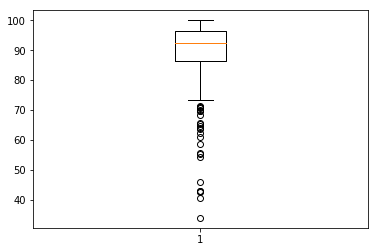

In [99]:
# Boxplot for the entire dataset (need to figure out how to break this into locations
# so we can see the range more clearly

plt.boxplot(df["Percent in Poverty"])

Location
Austin    AxesSubplot(0.125,0.125;0.775x0.755)
Dallas    AxesSubplot(0.125,0.125;0.775x0.755)
Laredo    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Percent in Poverty, dtype: object

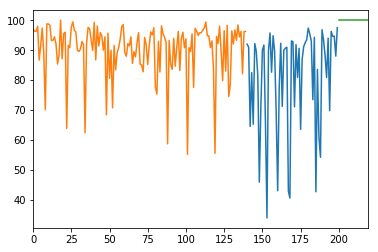

In [118]:
# Another way to see the range in poverty level and volume (width) of schools
# Austin is in blue, Dallas in orange, Laredo in green

df.groupby("Location")["Percent in Poverty"].plot()

Location
Austin    AxesSubplot(0.125,0.125;0.775x0.755)
Dallas    AxesSubplot(0.125,0.125;0.775x0.755)
Laredo    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Percent in Poverty, dtype: object

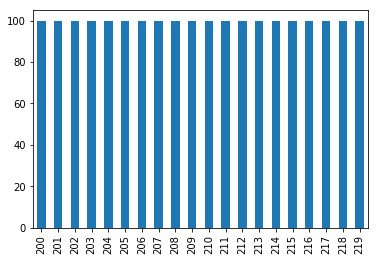

In [120]:
# Well, this seems useless as a visual

df.groupby("Location")["Percent in Poverty"].plot(kind = "bar")

In [121]:
pov_groups_ct = pd.crosstab(df["Location"], df["Poverty Groups"])

In [122]:
pov_groups_ct

Poverty Groups,40-49,50-59,60-69,70-79,80-89,90-100,< 40
Location,,,,,,,
Austin,5,1,5,7,9,32,1
Dallas,0,3,3,7,24,103,0
Laredo,0,0,0,0,0,20,0


In [123]:
food_desert_crosstab

Food Desert,No,Yes,All
Location,,,
Austin,21,39,60
Dallas,57,83,140
Laredo,14,6,20
All,92,128,220


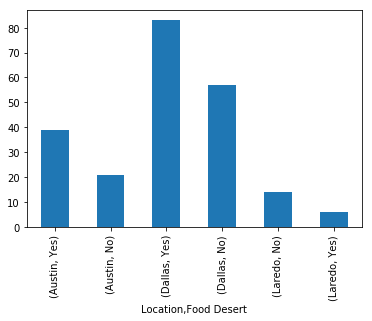

In [125]:
# Not a very helpful plot, but one that shows relative number of food deserts;
# This would be more useful as a stacked bar chart

df.groupby("Location")["Food Desert"].value_counts().plot(kind = "bar")

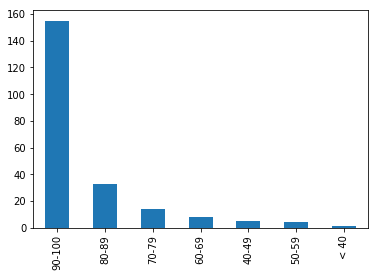

In [126]:
# A quick look at the poverty bins -- most of the schools in our dataset are in the
# 90-100% range

# This would be a decent graphic if we stacked the bars colors for each cityd

df["Poverty Groups"].value_counts().plot(kind = "bar")

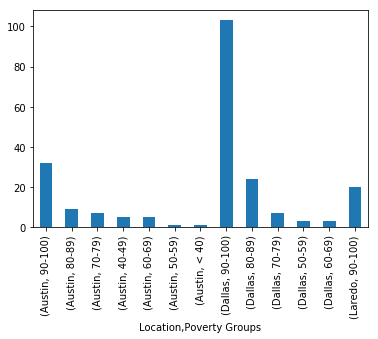

In [127]:
# Interesting in how we suddenly see Dallas as the biggest contributor of poorest groups

df.groupby("Location")["Poverty Groups"].value_counts().plot(kind = "bar")

In [128]:
# Margins are present ("All"), which allows for some calculations if wanted

food_desert_crosstab

Food Desert,No,Yes,All
Location,,,
Austin,21,39,60
Dallas,57,83,140
Laredo,14,6,20
All,92,128,220


In [154]:
# Takes out the totals so that just the numbers in the tab are graphed

food_desert_no_margins = pd.crosstab(df["Location"], df["Food Desert"])

In [132]:
food_desert_no_margins

Food Desert,No,Yes
Location,,
Austin,21,39
Dallas,57,83
Laredo,14,6


In [133]:
# This takes the crosstab above and turns each row (axis = 0) into percentages that
# sum to one to normalize the data (make all bars in the chart below the same height)

food_desert_pct = food_desert_no_margins.div(food_desert_no_margins.sum(1).astype(float), 
                                           axis = 0)

In [134]:
food_desert_pct

Food Desert,No,Yes
Location,,
Austin,0.350000,0.650000
Dallas,0.407143,0.592857
Laredo,0.700000,0.300000


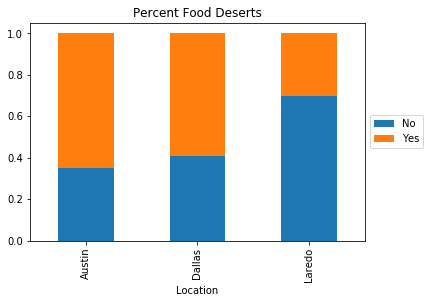

In [185]:
# we see what percentage of each group meets
# our criteria -- but can't tell anything about the underlying volume
# Still, this is kind of a useful plot for seeing who has the most food deserts
# by percentage

food_desert_pct.plot(kind = 'bar', stacked = True, legend = False, title = "Percent Food Deserts")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Location
Austin    AxesSubplot(0.125,0.125;0.775x0.755)
Dallas    AxesSubplot(0.125,0.125;0.775x0.755)
Laredo    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Poverty Groups, dtype: object

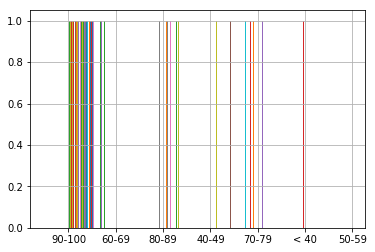

In [140]:
# I'm not entirely sure what's going on with this histogram

df.groupby("Location")["Poverty Groups"].hist(bins = 10)

In [144]:
# It will be easier to assign the groupby to a variable for future plotting

data = df.groupby("Location")["Percent in Poverty"]

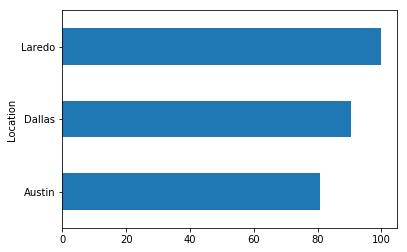

In [146]:
# mean poverty percent in poverty by city 

data.mean().plot(kind = 'barh')

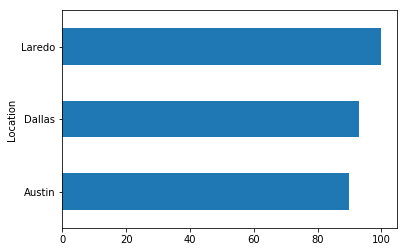

In [147]:
# median poverty percent in poverty by city 

data.median().plot(kind = 'barh')

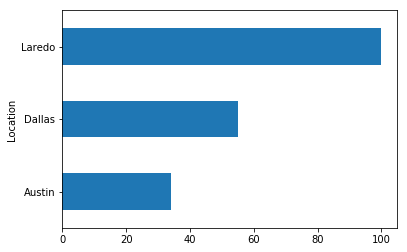

In [148]:
# minimum poverty percent in poverty by city -- note how much lower Austin is
# barh means horizontal bar

data.min().plot(kind = 'barh')

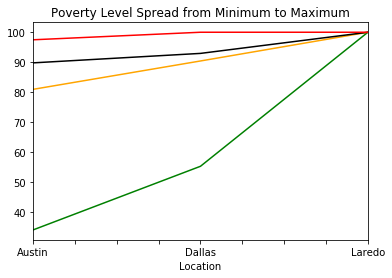

In [169]:
# This plot helps show the variation in poverty levels among the different cities
# Austin is blue, Dallas is orange, and Laredo is green. Don't know why Laredo
# isn't a straight line, as all its Title 1 schools have 100% poverty rate
# I figured min to max would look better as green is lower poverty and red is higher
# Since median has been a good measure, I put it in black. It moves much less than the
# other two across groups. We need a legend for this plot to explain what each color does.

data.min().plot(c = 'green')
data.mean().plot(c = 'orange')
data.median().plot(c = 'black')
data.max().plot(c = 'red', title = 'Poverty Level Spread from Minimum to Maximum')

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.747343  , 0.74755181, 0.75539073, 0.75939834, 0.76395689,
        0.77058471, 0.77929409, 0.78223335, 0.78237778, 0.79627009,
        0.79175523, 0.79538044, 0.79495226, 0.76273394, 0.76563988,
        0.76065532, 0.75793307, 0.76662097, 0.76616605, 0.75910913,
        0.75597828]),
 <matplotlib.lines.Line2D at 0x1a28ea54e0>)

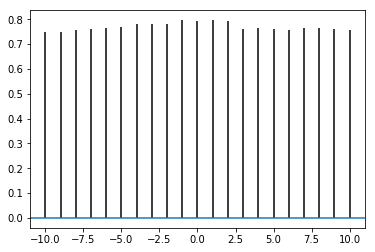

In [170]:
# This is supposed to graph correlation, but I'm not following what's going on

plt.xcorr(df["Percent in Poverty"], df["Driving Distance (miles)"])

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([26993.892, 27105.686, 27357.669, 27373.913, 27063.692, 27160.896,
        27338.881, 27235.118, 28385.545, 28400.834, 28271.388, 28432.601,
        27936.545, 27931.388, 27826.435, 27515.447, 27278.786, 27116.013,
        26972.912, 26693.006, 26685.55 ]),
 <matplotlib.lines.Line2D at 0x1a290c71d0>)

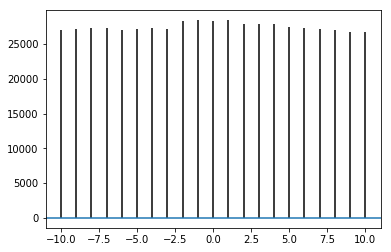

In [172]:
plt.xcorr(df["Driving Distance (miles)"], df["Percent in Poverty"], normed = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a28f99ef0>,
      dtype=object)

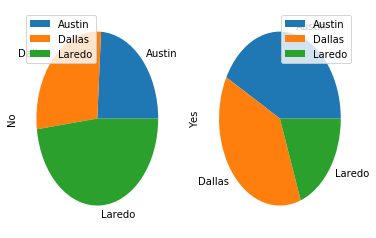

In [174]:
# Not useful unless we do one pie per city of 'yes'/'no' answers, and even then, the bar plot
# below is easier to read

food_desert_pct.plot(kind = 'pie', subplots = True)

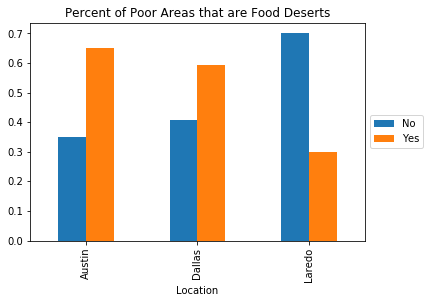

In [182]:
# Another bar chart that's maybe easier to read than the stacked bar

food_desert_pct.plot(kind = 'bar', title = 'Percent of Poor Areas that are Food Deserts', 
                     legend = False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

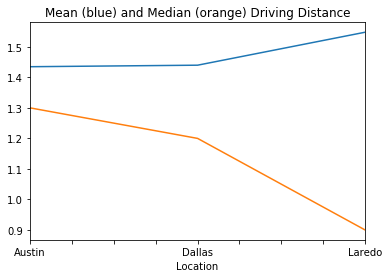

In [193]:
# Looks like we have one or two outliers in Laredo that push its mean up on driving distance
# A legend would be better than having to explain colors in the title

df.groupby("Location")["Driving Distance (miles)"].mean().plot(title = "Mean (blue) and Median (orange) Driving Distance")
df.groupby("Location")["Driving Distance (miles)"].median().plot()



In [198]:
# This is just a general groupby; I'd like to see one where the value of Food Desert is "yes" and 
# we see the mean poverty level only for the "yes" group

df.groupby("Location")["Percent in Poverty"].median()

Location
Austin     89.765
Dallas     92.930
Laredo    100.000
Name: Percent in Poverty, dtype: float64

In [231]:
df.head(1)

,Bus Distance (miles),Closest Store,Driving Distance (miles),Location,Percent in Poverty,Poverty Groups,School Name,Store Address,Walking Distance (miles),Zip Code,Food Desert
0,1.4,Fiesta Mart,1.4,Dallas,97.13,90-100,William M Anderson Elementary,"10121 E Lake June Rd, Dallas, TX 75217",1.2,75217.0,Yes


In [203]:
# Trying to figure out how to isolate rows that have 'yes' value

# yes_food_desert = df["Food Desert"] == "Yes"
# pct_pov = df["Percent in Poverty"]
# poverty_and_food_desert = []
    
# for yes in yes_food_desert == True:
#     poverty_and_food_desert.append(pct_pov[yes])

yes_df = pd.DataFrame(df[['Percent in Poverty', 'Food Desert']])

In [205]:
# The two factors in their own dataframe
yes_df.head()

,Percent in Poverty,Food Desert
0,97.13,Yes
1,96.33,No
2,96.24,Yes
3,98.00,Yes
4,86.67,Yes


In [206]:
# Argh -- still not working!
yes_food_desert = []

if yes_df['Food Desert'] == 'Yes':
    yes_food_desert.append(yes_df['Percent in Poverty'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [208]:
# Not able to locate them with this command...
# df.loc("Food Desert" == 'Yes')

In [209]:
# Here's one where location isn't considered -- slightly higher poverty level where there *isn't* a food desert

df.groupby("Food Desert")["Percent in Poverty"].median()

Food Desert
No     93.75
Yes    91.64
Name: Percent in Poverty, dtype: float64

In [211]:
# Aha!

pct_pov = df.groupby(["Food Desert", "Location"])["Percent in Poverty"].median()
pct_pov

Food Desert  Location
No           Austin       89.90
             Dallas       93.30
             Laredo      100.00
Yes          Austin       89.63
             Dallas       92.22
             Laredo      100.00
Name: Percent in Poverty, dtype: float64

In [219]:
# Better looking explanation

pct_pov2 = df.groupby(["Location", "Food Desert"])["Percent in Poverty"].median()
pct_pov2

Location  Food Desert
Austin    No              89.90
          Yes             89.63
Dallas    No              93.30
          Yes             92.22
Laredo    No             100.00
          Yes            100.00
Name: Percent in Poverty, dtype: float64

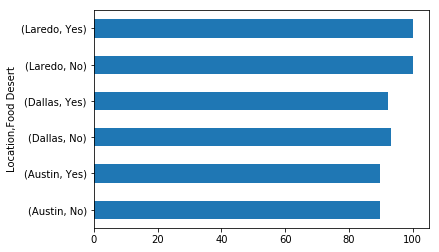

In [217]:
# This graphic isn't very helpful, although you can sort of see that there isn't much
# difference between the yes/no poverty level. There's a better way to show it, though

df.groupby(["Location", "Food Desert"])["Percent in Poverty"].median().plot(kind = 'barh')

In [218]:
pct_pov.unstack()

Location,Austin,Dallas,Laredo
Food Desert,,,
No,89.90,93.30,100.0
Yes,89.63,92.22,100.0


In [220]:
# This is a slightly prettier way to see the percentages laid out (but only prettier in jupyter notebook on
# your computer, as opposed to on GitHub)

# It's pretty clear from this that there's no correlation between poverty level and status as a food desert

pct_pov2.unstack()

Food Desert,No,Yes
Location,,
Austin,89.9,89.63
Dallas,93.3,92.22
Laredo,100.0,100.00


In [234]:
# This is kind of interesting: the drive is much farther than one mile if you're in a food desert, and is
# farthest in Laredo and Dallas -- one mile farther than locations that don't qualify as food deserts

desert_drive = df.groupby(["Location", "Food Desert"])["Driving Distance (miles)"].median()
desert_drive.unstack()

Food Desert,No,Yes
Location,,
Austin,0.90,1.60
Dallas,0.70,1.70
Laredo,0.75,1.75


In [236]:
# Pulling poverty percentage into its own array 

poverty_level = df["Percent in Poverty"]

In [237]:
# Correlation between the driving distance and the poverty level
# This is so small that it's negligible

driving_distance.corr(poverty_level)

0.0036589292969827127

In [239]:
# Just grouping by location and calling median gives us medians for all the numerical values

df.groupby("Location").median()

,Bus Distance (miles),Driving Distance (miles),Percent in Poverty,Walking Distance (miles),Zip Code
Location,,,,,
Austin,1.45,1.3,89.765,NaN,78744.0
Dallas,1.30,1.2,92.930,1.1,75217.0
Laredo,NaN,0.9,100.000,NaN,NaN


In [267]:
# If we want to capture which zip codes have the most Title 1 schools, we'll see that Dallas is our worst
# performer, with the top 4 zip codes -- all of which have schools with greater poverty than the worst
# in Austin. Laredo is excluded for now, as it has no zip code info. The worst five are captured below.
# It would be interesting to see if those zips are more likely to be food deserts

df_ZipCodes = df.groupby("Zip Code").size().sort_values(ascending = False)
worst_five_zips = df_ZipCodes.head()
worst_five_zips

Zip Code
75217.0    16
75211.0    14
75216.0    11
75227.0     9
78744.0     8
dtype: int64

In [268]:
# Now how do we find food desert status in those worst zip codes? It will be ones where the driving distance
# is greater than a mile


In [269]:
# Forty of Dallas' 140 Title 1 schools are in four zip codes -- about 29%

40/140

0.2857142857142857

In [274]:
# Just looking quickly at all zip codes and their corresponding driving distances to nearest store,
# our worst five zips in terms of number of schools doesn't line up with the worst drives. Without checking,
# my guess is that the worst zips below are ones that have few schools, which indicates a smaller population
# and thus a smaller number of stores needed, which increases the distance. I could check to see if there's
# an inverse correlation between number of schools in a zip code and driving distance

# Three of the four Dallas school worst zip codes have a median driving distance of 1.7 miles and the other is 
# 0.75. The worst Austin zip code has a median driving distance of 1.65 miles. 

df.groupby(["Location", "Zip Code"])["Driving Distance (miles)"].median().sort_values(ascending = False)

Location  Zip Code
Dallas    75234.0     3.50
Austin    78724.0     3.25
          78749.0     3.20
Dallas    75241.0     3.15
          75006.0     2.50
          75223.0     2.45
          75230.0     1.85
          75233.0     1.80
Austin    78745.0     1.80
Dallas    75217.0     1.70
          75227.0     1.70
          75216.0     1.70
          75244.0     1.65
Austin    78752.0     1.60
Dallas    75254.0     1.60
Austin    78753.0     1.50
Dallas    75232.0     1.50
          75215.0     1.45
Austin    78741.0     1.40
Dallas    75210.0     1.40
          75238.0     1.40
          75203.0     1.35
          75218.0     1.30
Austin    78721.0     1.30
Dallas    75214.0     1.30
Austin    78723.0     1.30
          78704.0     1.25
          78744.0     1.25
Dallas    75219.0     1.25
          75228.0     1.20
          75205.0     1.20
Austin    78758.0     1.20
          78702.0     1.20
Dallas    75209.0     1.15
          75235.0     1.10
          75159.0     1.10
Austin   

In [275]:
# Four of our five worst performing zips are above the median driving distance

df.groupby("Location")["Driving Distance (miles)"].median()

Location
Austin    1.3
Dallas    1.2
Laredo    0.9
Name: Driving Distance (miles), dtype: float64

In [276]:
worst_five_zips["Median Drive Distance"] = [1.7, 0.75, 1.7, 1.7, 1.65]

In [278]:
worst_five = pd.DataFrame()
worst_five["Zip Code"] = ['75217', '75211', '75216', '75227', '78744']
worst_five["Number of Schools"] = [16, 14, 11, 9, 8]
worst_five["Median Drive Distance"] = [1.7, 0.75, 1.7, 1.7, 1.65]
worst_five

,Zip Code,Number of Schools,Median Drive Distance
0,75217,16,1.70
1,75211,14,0.75
2,75216,11,1.70
3,75227,9,1.70
4,78744,8,1.65


In [290]:
# This is a better way to do what I did by hand above

worst_zips = df.groupby(["Location", "Zip Code"]).agg({"School Name": "size", 
                                                       "Driving Distance (miles)": "median"}).sort_values(by = "School Name", 
                                                                              ascending = False)

worst_zips.rename(columns = {"Driving Distance (miles)": "Median Driving Distance", 
                             "School Name": "Number of Schools"}, inplace = True)

worst_zips.head(5)

Number of Schools  Median Driving Distance
Location Zip Code                                            
Dallas   75217.0                  16                     1.70
         75211.0                  14                     0.75
         75216.0                  11                     1.70
         75227.0                   9                     1.70
Austin   78744.0                   8                     1.25

In [291]:
# We can look at larger groups within this

worst_zips.head(10)

Number of Schools  Median Driving Distance
Location Zip Code                                            
Dallas   75217.0                  16                     1.70
         75211.0                  14                     0.75
         75216.0                  11                     1.70
         75227.0                   9                     1.70
Austin   78744.0                   8                     1.25
Dallas   75229.0                   7                     1.10
Austin   78702.0                   7                     1.20
Dallas   75228.0                   6                     1.20
Austin   78745.0                   6                     1.80
Dallas   75232.0                   6                     1.50

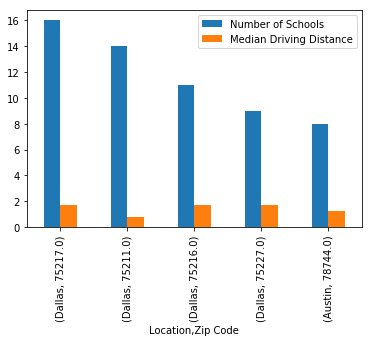

In [295]:
# I don't know how helpful this graphic is. Probably not at all. I'm curious, though, if there's
# a statistically significant increase in median driving distance in poorer zip codes

worst_zips.head().plot(kind = 'bar')